# Understanding the Linear Regression

## Part 1 - Data pre-processing

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [3]:
data = pd.read_csv('consumo_cerveja.csv',sep = ',',decimal=',')

# sep =  Symbol separating data from each other
# decimal = symbol that separates decimal places (Python doesn't read 21,9 but 21.9)

In [8]:
data.head(1)

,Data,Average_temp,Min_Temp,Max_Temp,Precipitation,Wekeend,Consume
0,2015-01-01,27.3,23.9,32.5,0.0,0.0,25.461


#### Changing the column names

In [10]:
data.columns = ['Date', 'Average_temp','Min_Temp','Max_Temp',
 'Precipitation','Wekeend', 'Consume']

In [11]:
data.head(1)

,Date,Average_temp,Min_Temp,Max_Temp,Precipitation,Wekeend,Consume
0,2015-01-01,27.3,23.9,32.5,0.0,0.0,25.461


#### Quantity of Null Data

In [14]:
round(data.isnull().sum()/len(data['Date']) * 100,2)

Date             61.21
Average_temp     61.21
Min_Temp         61.21
Max_Temp         61.21
Precipitation    61.21
Wekeend          61.21
Consume          61.21
dtype: float64

In [15]:
data.shape

(941, 7)

#### Deleting Null Data

In [16]:
data.dropna(inplace = True)

In [17]:
data.shape

(365, 7)

In [21]:
print(f'You lost {round(((365-941)/941) * 100,2)} % of your data with this operation ')  

You lost -61.21 % of your data with this operation 


#### Data Type

In [22]:
data.dtypes

Date              object
Average_temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Wekeend          float64
Consume           object
dtype: object

#### Changing the type of "Date" and "Consume" variables

In [25]:
data.Date = pd.to_datetime(data.Date)
#data.set_index('Data',inplace = True)

data.Consume = data.Consume.astype(str)
data.Consume = data.Consume.str.replace('.', '')

data['Consume'] = pd.to_numeric(data['Consume'])

## Part 2 - Data Analysis

#### Descriptive Statistic

In [26]:
data.describe()

,Average_temp,Min_Temp,Max_Temp,Precipitation,Wekeend,Consume
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


#### Matrix Correlation

Attention - Correlation isn't Multicollinearity

In [28]:
data.corr(method='pearson')

,Average_temp,Min_Temp,Max_Temp,Precipitation,Wekeend,Consume
Average_temp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Min_Temp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Max_Temp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitation,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Wekeend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consume,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [29]:
data.corr(method = 'spearman')

,Average_temp,Min_Temp,Max_Temp,Precipitation,Wekeend,Consume
Average_temp,1.000000,0.864661,0.912867,0.017111,-0.039258,0.569998
Min_Temp,0.864661,1.000000,0.664436,0.166770,-0.050208,0.391495
Max_Temp,0.912867,0.664436,1.000000,-0.116672,-0.023907,0.641289
Precipitation,0.017111,0.166770,-0.116672,1.000000,0.003799,-0.172381
Wekeend,-0.039258,-0.050208,-0.023907,0.003799,1.000000,0.497192
Consume,0.569998,0.391495,0.641289,-0.172381,0.497192,1.000000


#### Understanding the dependent variable behavior

Consume variable Time Series Behavior


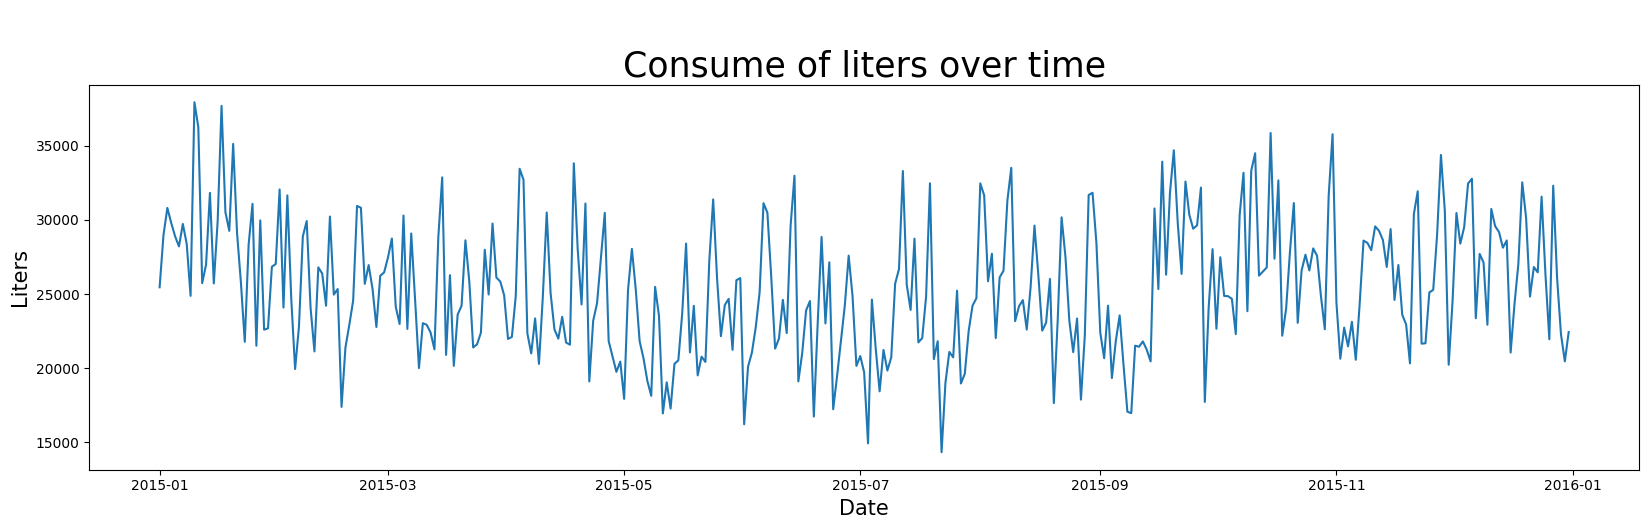

In [30]:
plt.figure(figsize = (20,5))

plt.title('\nConsume of liters over time',size = 25)
plt.plot(data['Date'],data['Consume'])
plt.xlabel('Date',size = 15)
plt.ylabel('Liters',size = 15)

plt.show()

#### Sazonality

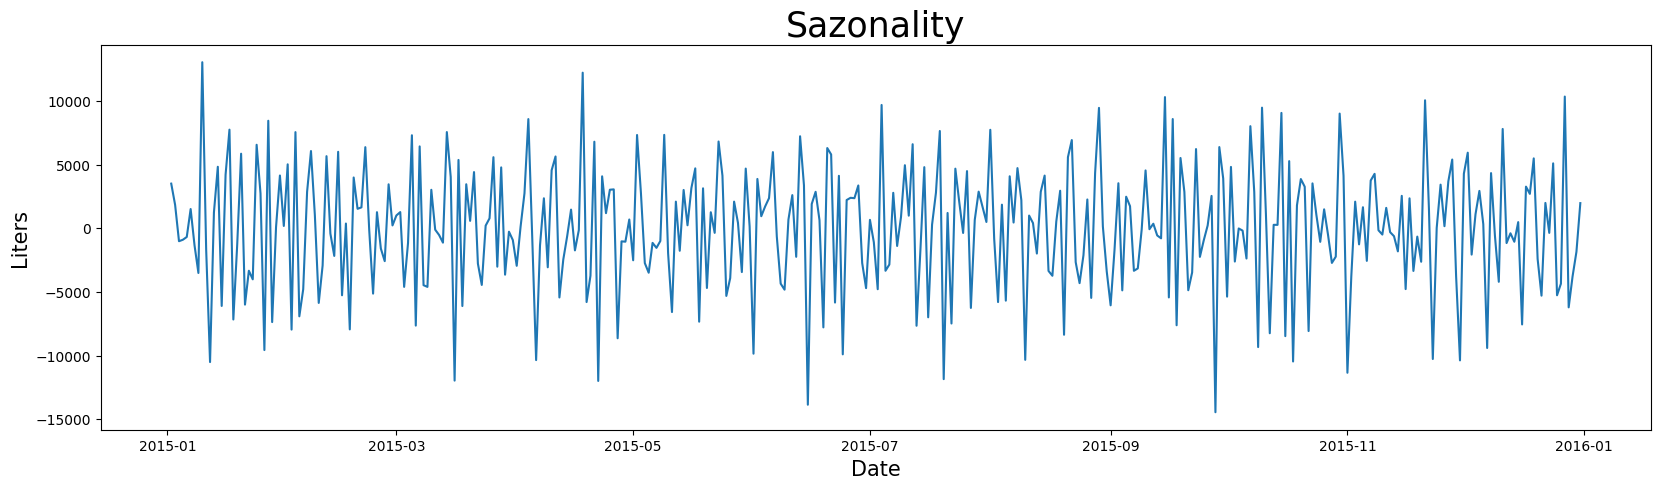

In [31]:
plt.figure(figsize = (20,5))

plt.title('Sazonality',size = 25)
plt.xlabel('Date',size = 15)
plt.ylabel('Liters',size = 15)

plt.plot(data['Date'],data['Consume'].diff())

plt.show()

#### Semi-Annual Moving Averages

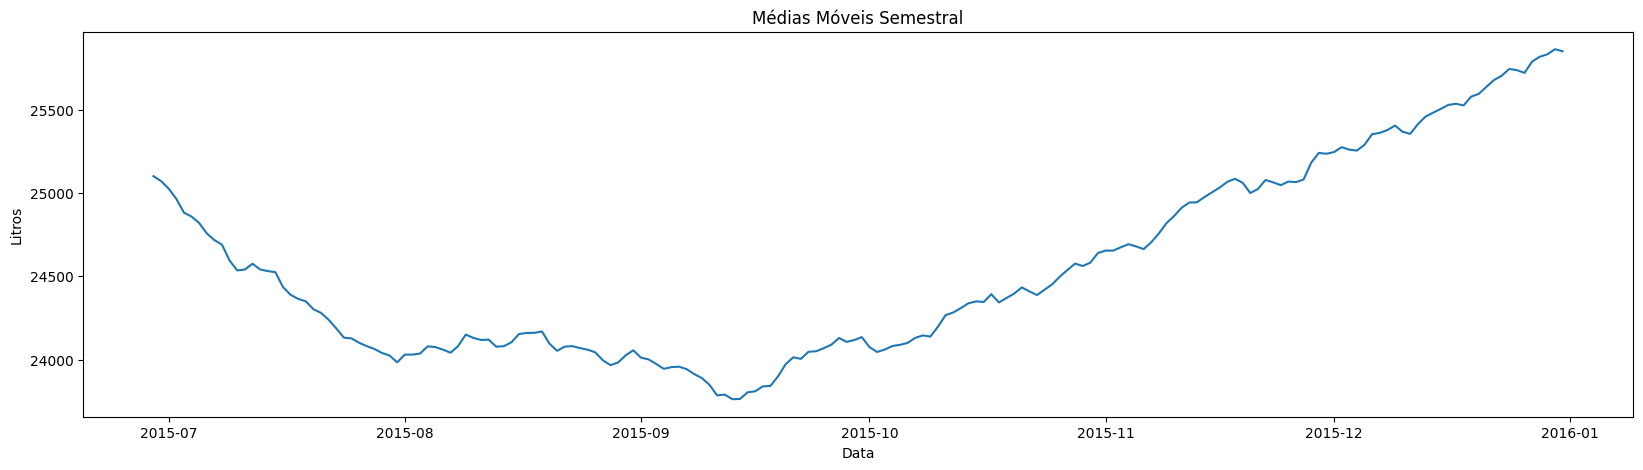

In [32]:
plt.figure(figsize = (20,5))

plt.title('Médias Móveis Semestral')
plt.xlabel('Data')
plt.ylabel('Litros')

plt.plot(data['Date'],data['Consume'].rolling(180).mean())

plt.show()

#### BoxPlot

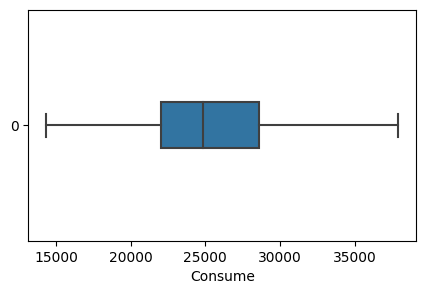

In [35]:
plt.figure(figsize = (5,3))

sns.boxplot(data = data['Consume'],orient = 'h',width = 0.2 )
plt.title('')
# orient - Defines whether the graph will be plotted Vertically (v) or Horizontally (h)
# width - Adjusts the width of the BoxPlot
plt.xlabel('Consume')
plt.show()

# In this case there aren't outliers